In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import joblib
import pandas as pd
warnings.filterwarnings('ignore')
matplotlib.rcParams["figure.figsize"]=(20,10)

In [8]:
df = pd.read_csv('pune_real_estate_dataset.csv')

df.tail(10)

area_type        availability          location   size   society  \
2491  Super Built-up  Under Construction           Kothrud  1 BHK  Society2   
2492  Super Built-up  Under Construction  Pimpri-Chinchwad  2 BHK  Society3   
2493             NaN  Under Construction               NaN  2 BHK       NaN   
2494        Built-up       Ready To Move            Pashan  1 BHK  Society2   
2495        Built-up  Under Construction         Hinjawadi  4 BHK       NaN   
2496        Built-up  Under Construction            Pashan  4 BHK  Society4   
2497  Super Built-up  Under Construction               NaN  2 BHK  Society2   
2498        Built-up       Ready To Move       Viman Nagar  2 BHK  Society1   
2499        Built-up  Under Construction     Shivaji Nagar  3 BHK  Society5   
2500          Carpet  Under Construction  Pimpri-Chinchwad  1 BHK  Society5   

      total_sqft  bath  balcony  price   floor       furnishing  
2491       800.0   3.0      3.0  69.82     5th      Unfurnished  
2492      1000.0   4.0      3.0  63.71     5th  Fully Furnished  
2493      1000.0   1.0      2.0  62.29     2nd      Unfurnished  
2494       800.0   4.0      1.0  60.79     5th   Semi-Furnished  
2495      1500.0   2.0      NaN  93.24     Top  Fully Furnished  
2496      1500.0   2.0      3.0  67.93     4th              NaN  
2497      1000.0   2.0      3.0  93.63  Ground   Semi-Furnished  
2498      1000.0   1.0      2.0  98.31     4th      Unfurnished  
2499      1200.0   1.0      3.0  91.82     3rd  Fully Furnished  
2500       800.0   4.0      3.0  59.93     3rd  Fully Furnished

In [7]:
df['location'].value_counts()

location
Aundh               208
Kothrud             205
Magarpatta          203
Sadashiv Peth       203
Wakad               199
Pimpri-Chinchwad    197
Pashan              197
Kharadi             189
Baner               183
Hinjawadi           178
Shivaji Nagar       178
Viman Nagar         176
Hadapsar            170
Name: count, dtype: int64

In [8]:
df.isnull().sum()

area_type        5
availability     9
location        15
size            12
society         13
total_sqft       4
bath             7
balcony          6
price            6
floor            4
furnishing       4
dtype: int64

In [10]:
# Drop columns with any NaN values
df= df.dropna()
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
floor           0
furnishing      0
dtype: int64

In [12]:
df.dropna(axis=1)
df = df.drop(['availability','area_type','floor','society'], axis ='columns')
df.head()

location   size  total_sqft  bath  balcony  price       furnishing
0       Wakad  3 BHK      1200.0   4.0      3.0  71.51  Fully Furnished
1       Aundh  1 BHK       800.0   4.0      1.0  92.48   Semi-Furnished
2  Magarpatta  1 BHK       800.0   3.0      1.0  89.73  Fully Furnished
3     Kharadi  3 BHK      1200.0   2.0      1.0  95.59   Semi-Furnished
4       Aundh  2 BHK      1000.0   3.0      1.0  94.80   Semi-Furnished

In [14]:
df['size'] = df['size'].apply(lambda x: int(x.split(' ')[0]))


In [16]:

le = LabelEncoder()
df['location'] = le.fit_transform(df['location'])
df['furnishing']=le.fit_transform(df['furnishing'])
df.head()

location  size  total_sqft  bath  balcony  price  furnishing
0        12     3      1200.0   4.0      3.0  71.51           0
1         0     1       800.0   4.0      1.0  92.48           1
2         6     1       800.0   3.0      1.0  89.73           0
3         4     3      1200.0   2.0      1.0  95.59           1
4         0     2      1000.0   3.0      1.0  94.80           1


Top 10 Locations by Frequency:
location
5     204
0     203
9     201
6     198
12    196
8     195
7     194
4     188
1     183
3     174
Name: count, dtype: int64


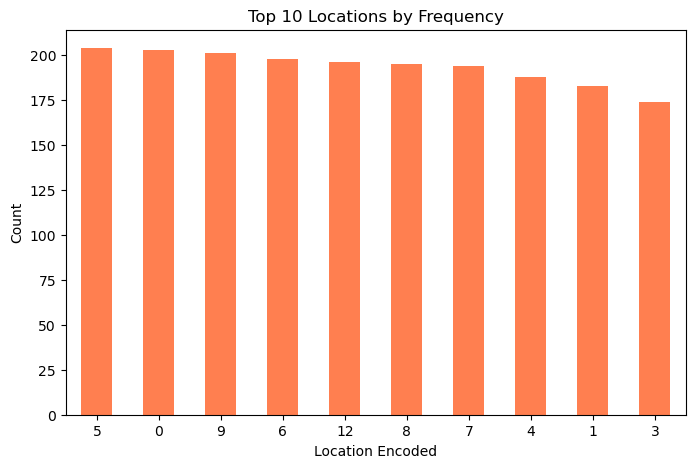

In [18]:
# Analyzing Locations (Top 10)
top_locations = df['location'].value_counts().head(10)
print("\nTop 10 Locations by Frequency:")
print(top_locations)

# Visualizing Top Locations
top_locations.plot(kind='bar', color='coral', figsize=(8, 5))
plt.title("Top 10 Locations by Frequency")
plt.xlabel("Location Encoded")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [19]:
df.describe()

location         size   total_sqft         bath      balcony  \
count  2449.000000  2449.000000  2449.000000  2449.000000  2449.000000   
mean      6.007350     2.478154  1121.192323     2.494896     2.005308   
std       3.727759     1.143874   264.212140     1.118068     0.818229   
min       0.000000     1.000000   800.000000     1.000000     1.000000   
25%       3.000000     1.000000   800.000000     2.000000     1.000000   
50%       6.000000     2.000000  1000.000000     2.000000     2.000000   
75%       9.000000     4.000000  1500.000000     4.000000     3.000000   
max      12.000000     4.000000  1500.000000     4.000000     3.000000   

             price   furnishing  
count  2449.000000  2449.000000  
mean     79.547031     1.052266  
std      17.377621     0.812311  
min      44.000000     0.000000  
25%      65.440000     0.000000  
50%      85.080000     1.000000  
75%      95.230000     2.000000  
max     103.900000     2.000000

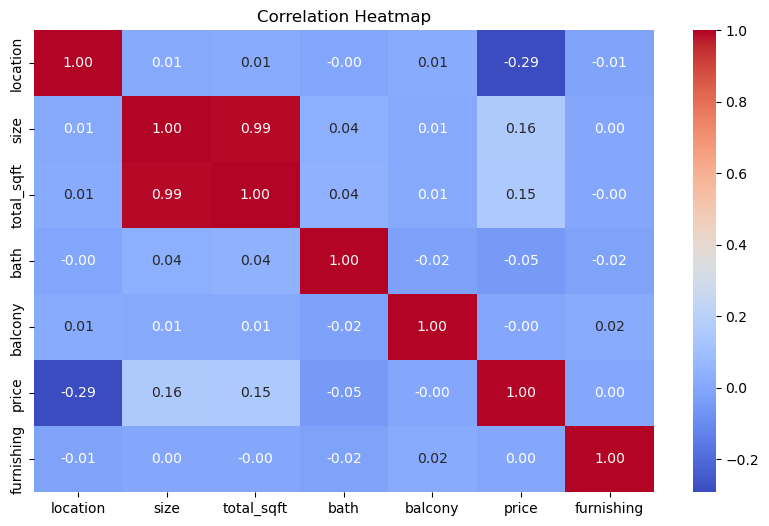

In [20]:
correlation_matrix = df.corr()
correlation_matrix

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

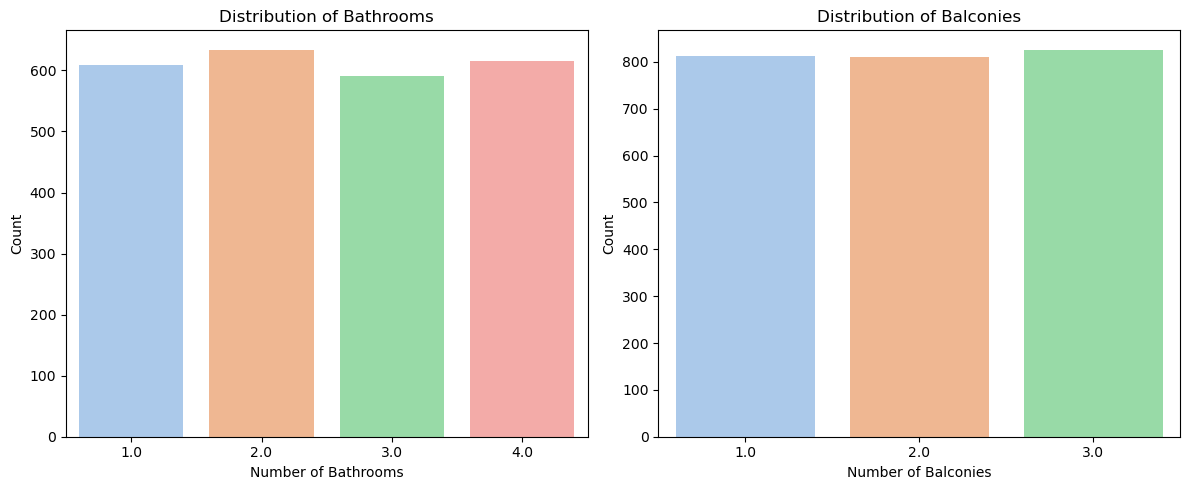

In [22]:
# Bathroom and Balcony Distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=df['bath'], data=df, ax=axes[0], palette='pastel')
axes[0].set_title("Distribution of Bathrooms")
axes[0].set_xlabel("Number of Bathrooms")
axes[0].set_ylabel("Count")

sns.countplot(x=df['balcony'], data=df, ax=axes[1], palette='pastel')
axes[1].set_title("Distribution of Balconies")
axes[1].set_xlabel("Number of Balconies")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


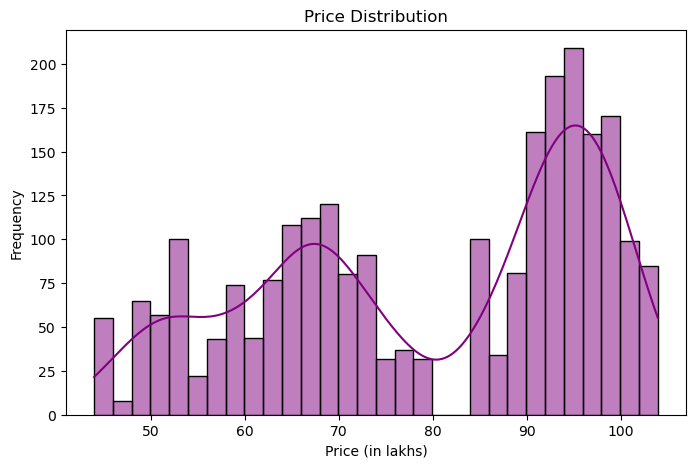

In [24]:
# Analyzing Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, bins=30, color='purple')
plt.title("Price Distribution")
plt.xlabel("Price (in lakhs)")
plt.ylabel("Frequency")
plt.show()

In [25]:
# Average price per BHK
avg_price_bhk = df.groupby('size')['price'].mean().sort_values()
print("\nAverage Price per BHK:")
print(avg_price_bhk)

# Plotting Average Price per BHK
avg_price_bhk.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Average Price per BHK")
plt.xlabel("BHK")
plt.ylabel("Average Price (in lakhs)")
plt.xticks(rotation=0)
plt.show()


Average Price per BHK:
size
1    75.307179
2    79.729947
3    80.836435
4    82.706901
Name: price, dtype: float64


In [26]:
df.keys()

Index(['location', 'size', 'total_sqft', 'bath', 'balcony', 'price',
       'furnishing'],
      dtype='object')

Epoch 1/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6578.6631 - mean_absolute_error: 79.2012 - val_loss: 6341.8306 - val_mean_absolute_error: 77.7557
Epoch 2/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5745.1558 - mean_absolute_error: 73.6733 - val_loss: 3354.2507 - val_mean_absolute_error: 55.3686
Epoch 3/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2101.3413 - mean_absolute_error: 41.1546 - val_loss: 393.9955 - val_mean_absolute_error: 16.2991
Epoch 4/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 437.4056 - mean_absolute_error: 17.1804 - val_loss: 342.3153 - val_mean_absolute_error: 15.3135
Epoch 5/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 366.9471 - mean_absolute_error: 15.6826 - val_loss: 315.4066 - val_mean_absolute_error: 14.6624
Epoch 6/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 326.6240 - mean_absolute_error: 14.6128 - val_loss: 298.6473 - val_mean_absolute_error: 14.2024
Epoch 7/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 323.47

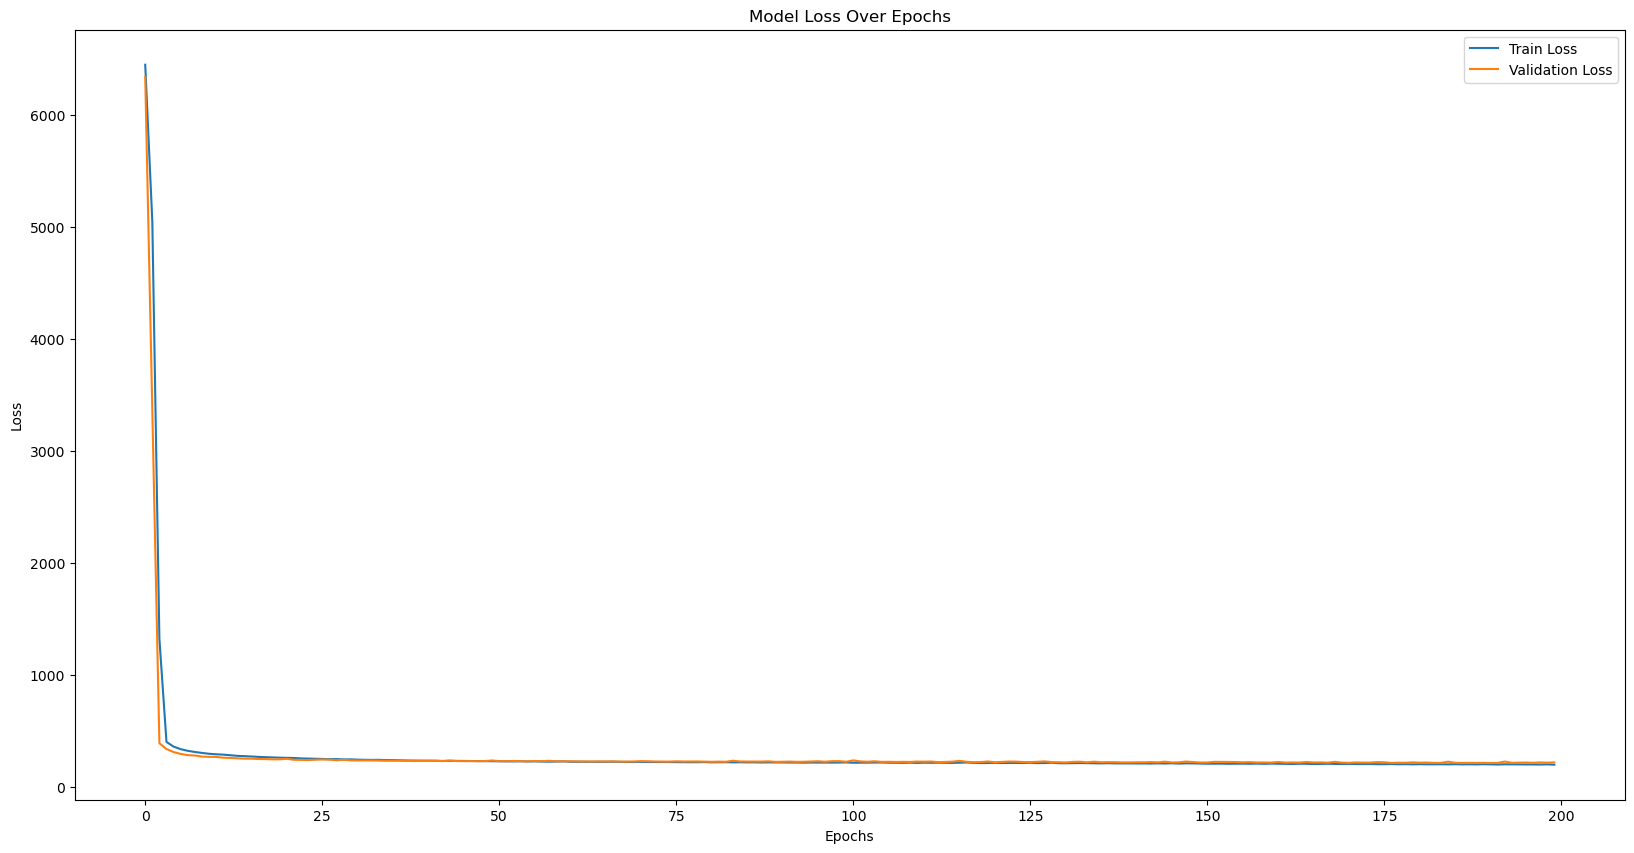

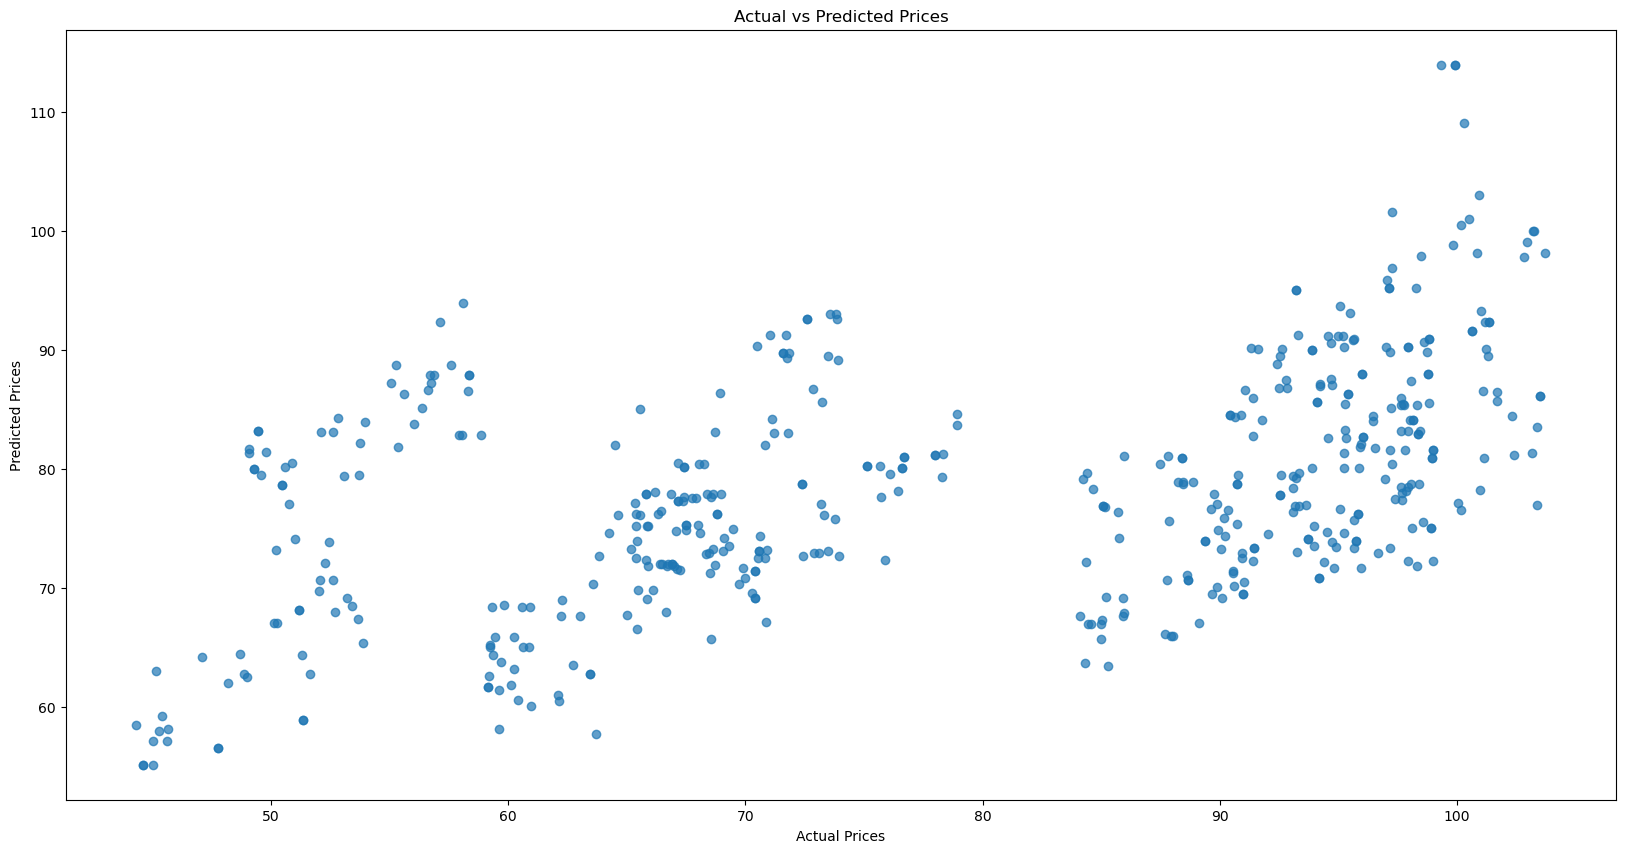

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming df is your DataFrame
X = df[['total_sqft', 'bath', 'balcony', 'size', 'location', 'furnishing']]
y = df['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the Deep Learning model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer 1
    Dense(16, activation='relu'),  # Hidden layer 2
    Dense(1, activation='linear')  # Output layer
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Training the model
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# Evaluating the model
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

# Plotting loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()

# Visualizing actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
rf_predictions = rf.predict(X_test)

# Evaluate the model
rf_r2 = rf.score(X_test, y_test)*100  # R² score directly from the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

print("Random Forest Regressor Performance:")
print(f"model Accuracy : {rf_r2:.4f}")
print(f"Mean Squared Error: {rf_mse:.4f}")
print(f"Mean Absolute Error: {rf_mae:.4f}")

# Visualize Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.title('Random Forest: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()




Random Forest Regressor Performance:
model Accuracy : 99.9122
Mean Squared Error: 0.2627
Mean Absolute Error: 0.3871


In [52]:
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({
    'Actual Price': y_test.values,  # Actual prices
    'Predicted Price': rf_predictions  # Predicted prices
})

# Display 10 random samples
sample_comparison = comparison_df.sample(15, random_state=0)  # Random 10 samples
print("Actual vs Predicted Prices (Random Sample of 10):")
print(sample_comparison)

# If you'd like to visualize it as a table
sample_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Actual vs Predicted Prices (Random Sample of 10)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(['Actual Price', 'Predicted Price'])
plt.tight_layout()
plt.show()


Actual vs Predicted Prices (Random Sample of 10):
     Actual Price  Predicted Price
238         77.99        77.203922
179        103.48       102.358000
437         95.23        95.303367
325         49.07        49.205945
15          88.68        87.840200
76          85.28        85.052198
353         67.12        67.913053
422         98.95        98.589033
21          73.92        73.476957
459         91.39        91.214657
253         97.66        98.167394
100         68.62        68.236292
281         58.06        58.151759
393         96.55        96.417633
272         75.89        75.735800


In [35]:
X_test

total_sqft  bath  balcony  size  location  furnishing
1338      1000.0   1.0      2.0     2         9           2
990        800.0   2.0      1.0     1         3           1
2413      1200.0   1.0      3.0     3         0           0
642       1500.0   3.0      3.0     4         9           2
607        800.0   2.0      3.0     1        12           1
...          ...   ...      ...   ...       ...         ...
192        800.0   3.0      1.0     1         7           1
289        800.0   1.0      3.0     1         3           0
174        800.0   2.0      3.0     1        10           1
2345      1200.0   1.0      2.0     3         4           0
1531      1500.0   1.0      3.0     4         7           0

[490 rows x 6 columns]

In [47]:
y_test[990]

85.08

In [322]:
import joblib
# Save the LabelEncoder to a file
joblib.dump(le, 'location_encoder.pkl')
# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'")
# Save the trained Random Forest model
joblib.dump(rf, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")


Scaler saved as 'scaler.pkl'
Model saved as 'random_forest_model.pkl'
